<a href="https://colab.research.google.com/github/jyryu3161/DrugDiscovery/blob/main/lec6_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Synthetic Lethlaity Prediction

In [ ]:
!pip install seaborn

In [ ]:
!git clone https://github.com/jyryu3161/DrugDiscovery.git

fatal: destination path 'DrugDiscovery' already exists and is not an empty directory.


In [ ]:
import pandas as pd

# Load Genomics of Drug Sensitivity in Cancer dataset
df = pd.read_csv('./DrugDiscovery/Data-GDSC-OV_ANOVA.csv')

# Select only PARP inhibitors
df = df[df['Drug target'] == 'PARP1, PARP2']

# Filter by p-value threshold (0.05)
df = df[df['feature_pval'] <= 0.05]

# Exclude features starting with 'cna' (copy number alteration)
df = df[~df['Feature Name'].str.startswith('cna')]

# Print unique feature names
print('Feature name')
print(list(set(df['Feature Name'])))

# Get unique PARP inhibitor drug names
Target_drugs = list(set(df['Drug name']))
print('PARP inhibitors')
print(Target_drugs)

Feature name
['BRCA1_mut', 'MLL2_mut', 'NF1_mut', 'SMARCA4_mut', 'SMAD4_mut']
PARP inhibitors
['Veliparib', 'Olaparib', 'Niraparib', 'Talazoparib', 'Rucaparib']


In [ ]:
# Define the target gene for this analysis
target_gene = 'BRCA1'

# Load genetic variant data for ovarian cancer cell lines from GDSC dataset
df2 = pd.read_csv('./DrugDiscovery/Data-GDSC-OV_Genetic_features_variant.csv')

# Print the loaded dataframe
print(df2)

# Filter for genetic feature information related to the target gene
tmp_df = df2[df2['Genetic Feature'] == '%s_mut'%(target_gene)]

# Extract cell lines with mutations in the target gene
tmp_df_pos = tmp_df[tmp_df['IS Mutated'] == 1]

# Extract cell lines without mutations in the target gene
tmp_df_neg = tmp_df[tmp_df['IS Mutated'] == 0]

# Get unique list of cell lines with mutations
mut_pos_cells = list(set(tmp_df_pos['Cell Line Name']))

# Get unique list of cell lines without mutations
mut_neg_cells = list(set(tmp_df_neg['Cell Line Name']))

# Print cell lines with and without mutations
print(mut_pos_cells)
print(mut_neg_cells)

     Cell Line Name  COSMIC ID         GDSC Desc1 GDSC Desc2 TCGA Desc  \
0           OVCAR-3     905933  urogenital_system      ovary        OV   
1           OVCAR-3     905933  urogenital_system      ovary        OV   
2           OVCAR-3     905933  urogenital_system      ovary        OV   
3           OVCAR-3     905933  urogenital_system      ovary        OV   
4           OVCAR-3     905933  urogenital_system      ovary        OV   
...             ...        ...                ...        ...       ...   
1447         JHOS-3    1480358  urogenital_system      ovary        OV   
1448         JHOS-3    1480358  urogenital_system      ovary        OV   
1449         JHOS-3    1480358  urogenital_system      ovary        OV   
1450         JHOS-3    1480358  urogenital_system      ovary        OV   
1451         JHOS-3    1480358  urogenital_system      ovary        OV   

     Genetic Feature  IS Mutated  Recurrent Gain Loss  Genes in Segment  
0         ARID1A_mut           0     

<ipython-input-19-ada2aad6507a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-19-ada2aad6507a>:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.


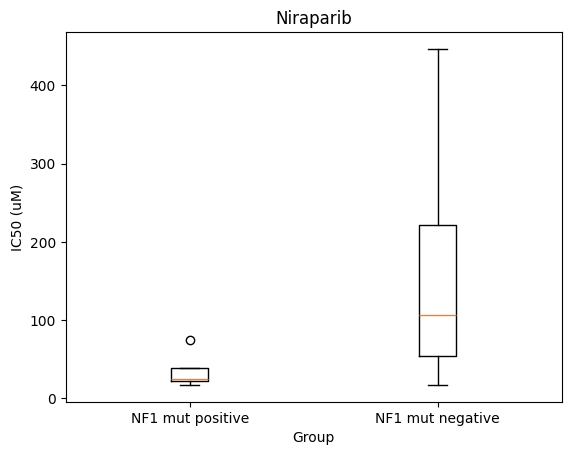

<ipython-input-19-ada2aad6507a>:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.


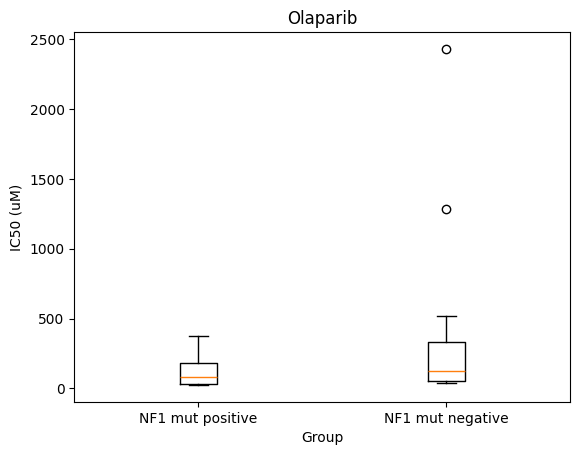

<ipython-input-19-ada2aad6507a>:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.


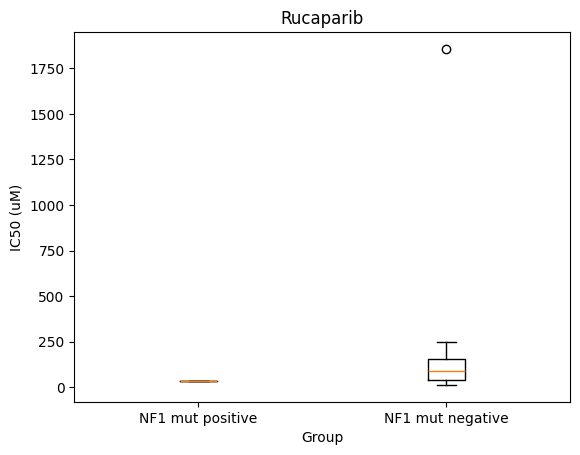

<ipython-input-19-ada2aad6507a>:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.


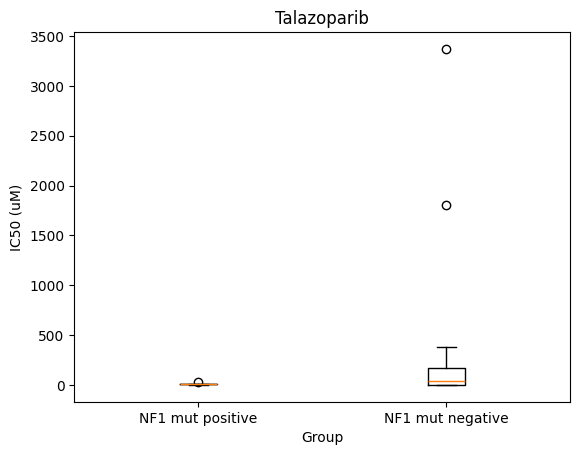

<ipython-input-19-ada2aad6507a>:28: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.


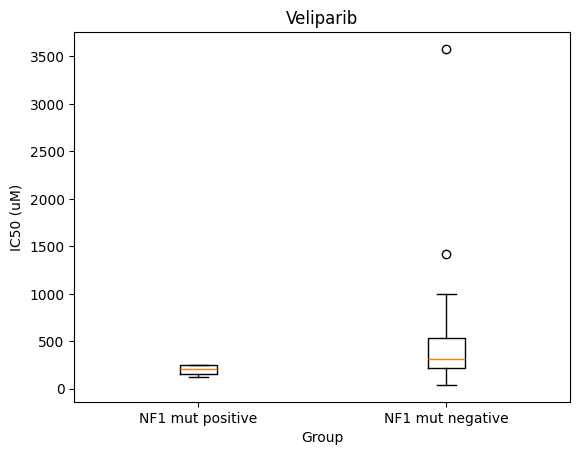

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load IC50 data from CSV file
ic50_df = pd.read_csv('./DrugDiscovery/Data-GDSC-OV_IC_Mon Sep 18 04_05_59 2023.csv')
# Filter for selected inhibitors
ic50_df = ic50_df[ic50_df['Drug Name'].isin(Target_drugs)]

# Convert IC50 from log scale to linear scale by applying exponential
ic50_df['IC50 new'] = np.exp(ic50_df['IC50'])

# Analyze data for each PARP inhibitor drug by grouping
for each_drug, each_df in ic50_df.groupby('Drug Name'):
    # Extract data for cell lines with mutations
    pos_data_df = each_df[each_df['Cell Line Name'].isin(mut_pos_cells)]

    # Extract data for cell lines without mutations
    neg_data_df = each_df[each_df['Cell Line Name'].isin(mut_neg_cells)]

    # Get IC50 values for cell lines with mutations
    pos_ic50_values = pos_data_df['IC50 new'].values

    # Get IC50 values for cell lines without mutations
    neg_ic50_values = neg_data_df['IC50 new'].values

    # Create boxplot comparing IC50 values for mutation-positive and mutation-negative groups
    plt.boxplot([pos_ic50_values, neg_ic50_values], labels=['%s mut positive'%(target_gene), '%s mut negative'%(target_gene)])
    plt.title('%s'%(each_drug))
    plt.xlabel('Group')
    plt.ylabel('IC50 (uM)')
    plt.show()

# Target Validation Using LLM

In [ ]:
!pip install Bio
!pip install openai

In [ ]:
import os
import json
import pandas as pd
from Bio import Entrez
from openai import OpenAI
from typing import List, Dict
import time
import re

# Set your contact email for NCBI Entrez and initialize OpenAI client
Entrez.email = "your_email@example.com"
openai_client = OpenAI(api_key=os.getenv("OPENAI_API_KEY", "input")) #

def fetch_pubmed_abstracts(disease: str, gene: str, max_results: int = 5) -> List[Dict]:
    """
    Search PubMed for articles containing both disease and gene terms.
    Returns a list of dicts with PMID, title, and abstract.
    """
    try:
        query = f"{disease}[Title/Abstract] AND {gene}[Title/Abstract]"
        handle = Entrez.esearch(db="pubmed", term=query, retmax=max_results)
        record = Entrez.read(handle)
        handle.close()
        pmids = record["IdList"]
        results = []
        for pmid in pmids:
            handle = Entrez.efetch(db="pubmed", id=pmid, retmode="xml")
            article = Entrez.read(handle)['PubmedArticle'][0]
            handle.close()
            title = article['MedlineCitation']['Article']['ArticleTitle']
            abstract_list = article['MedlineCitation']['Article'].get('Abstract', {}).get('AbstractText', [])
            abstract = abstract_list[0] if abstract_list else ""
            results.append({"pmid": pmid, "title": title, "abstract": abstract})
        return results
    except Exception as e:
        print(f"Error fetching PubMed abstracts for {disease} and {gene}: {e}")
        return []

def parse_openai_response(response_content):
    # Use regex to find the first valid JSON object in the response
    json_match = re.search(r'\{.*\}', response_content, re.DOTALL)
    if json_match:
        json_str = json_match.group(0)
        try:
            return json.loads(json_str)
        except json.JSONDecodeError as e:
            raise json.JSONDecodeError(f"Failed to parse JSON: {e}", json_str, e.pos)
    else:
        raise ValueError("No valid JSON found in response")

def evaluate_article(disease: str, gene: str, title: str, abstract: str) -> Dict:
    prompt = f"""
Disease: {disease}
Gene: {gene}
Article Title: {title}
Abstract: {abstract}

Instructions: Analyze the provided abstract carefully and respond in the specified JSON format. Focus *only* on information explicitly stated or strongly implied within this specific abstract.

1.  **Summarize:** Provide a concise, one-sentence summary describing the *specific main finding* reported in the abstract concerning the relationship between the gene '{gene}' and the disease '{disease}'. **This summary must be derived directly from the abstract's content and should not be generic.**
2.  **Identify Potential Therapeutic Target:** Determine if the abstract presents *specific findings* suggesting the gene '{gene}' is a potential therapeutic target for '{disease}'.
    * Set `is_potential_target` to `true` **only if** the abstract describes results where:
        * Modulating the gene's activity demonstrably affects disease pathology, or disease model outcomes.
        **Crucially, this often involves evidence presented at the cellular (in vitro) or animal (in vivo) level, such as showing that *gene knock-down or knock-out leads to a demonstrable therapeutic effect* (e.g., reduced disease phenotype, improved cell viability, slowed disease progression in models).
        ** Other forms of modulation (like pharmacological inhibition) showing similar effects also qualify.
    * **Important:** Simply reporting a correlation (e.g., gene expression levels differ in patients) or describing the gene's general biological function is **not sufficient** to mark it as a potential target *unless* the abstract directly links this to a potential therapeutic intervention strategy supported by experimental evidence presented within the abstract. There must be a clear indication of therapeutic relevance derived from specific results.
    * Base this determination strictly on the content of the provided abstract.
3.  **Describe Mechanism (if applicable):**
    * If `is_potential_target` is `true`, describe the *specific mechanism* mentioned or strongly implied *in the abstract* that explains *how* modulating '{gene}' could lead to a therapeutic benefit for '{disease}'.
    * **This description must be based on details found within the abstract.** If the abstract supports `is_potential_target` being true but *does not* specify the underlying mechanism, state "Mechanism not detailed in the abstract."
    * If `is_potential_target` is `false`, leave the `mechanism` field as an empty string ("").
    * **Do not use generic placeholders like '{{gene}}' or '{{disease}}' in your mechanism description.**

Respond in strict JSON format with the following keys:
- summary: [string] (The specific one-sentence summary based on the abstract)
- is_potential_target: [boolean] (True only if the abstract provides specific findings supporting therapeutic potential, particularly evidence like knock-down/out effects in models, False otherwise)
- mechanism: [string] (Specific mechanism from the abstract if `is_potential_target` is true and mechanism is described, "Mechanism not detailed in the abstract." if true but not described, or "" if false)

Example Output (Target with Mechanism - Knockdown):
{{
  "summary": "The abstract demonstrates that siRNA-mediated knock-down of Gene Alpha in Disease X cell lines reduces cell proliferation and induces apoptosis.",
  "is_potential_target": true,
  "mechanism": "Knock-down of Gene Alpha disrupts the Survival Pathway Y, leading to reduced proliferation and apoptosis of Disease X cells, according to the abstract."
}}

Example Output (Target with Mechanism - Knockout):
{{
  "summary": "This study shows that genetic knock-out of Gene Beta ameliorates disease symptoms and reduces pathological markers in a mouse model of Disease Z.",
  "is_potential_target": true,
  "mechanism": "The abstract suggests Gene Beta knock-out restores normal signaling pathway Q, which is dysregulated in Disease Z."
}}

Example Output (Target, Mechanism Not Detailed):
{{
  "summary": "This abstract reports that pharmacological inhibition of Enzyme C significantly improved outcomes in an animal model of Disease D.",
  "is_potential_target": true,
  "mechanism": "Mechanism not detailed in the abstract."
}}

Example Output (Not a Target - Correlation Only):
{{
  "summary": "The abstract describes a genome-wide association study identifying a SNP near Gene E that is associated with increased risk for Disease F.",
  "is_potential_target": false,
  "mechanism": ""
}}

Example Output (Not a Target - Functional Study Only):
{{
  "summary": "This research investigates the role of Protein G in regulating cellular trafficking pathways within neurons, without specific experimental links to Disease H treatment effects.",
  "is_potential_target": false,
  "mechanism": ""
}}
    """

    response = openai_client.chat.completions.create(
    model="gpt-4.1-mini",  # Updated to a valid model; replace with desired model
    messages=[
        {"role": "system", "content": "You are an expert biomedical researcher."},
        {"role": "user", "content": prompt}
    ],
    temperature=0
    )

    content = response.choices[0].message.content.strip()

    # Parse the cleaned JSON content
    parsed_content = parse_openai_response(content)
    return parsed_content

def analyze_genes(disease: str, genes: List[str], max_articles_per_gene: int = 3) -> pd.DataFrame:
    """
    Main function to fetch abstracts, evaluate each, and compile results.
    Writes results to 'results.csv' and returns a pandas DataFrame.
    """
    records = []
    for gene in genes:
        articles = fetch_pubmed_abstracts(disease, gene, max_results=max_articles_per_gene)
        print('No. of articles : ', len(articles))
        for art in articles:
            #try:
            ev = evaluate_article(disease, gene, art['title'], art['abstract'])
            #except:
            #    continue
            records.append({
                "Disease": disease,
                "Gene": gene,
                "PMID": art['pmid'],
                "Title": art['title'],
                "IsPotentialTarget": ev["is_potential_target"],
                "Summary": ev["summary"],
                "Mechanism": ev["mechanism"]
            })
            time.sleep(0.5)

    df = pd.DataFrame(records)
    try:
        df.to_csv("results.csv", index=False)
    except Exception as e:
        print(f"Error saving results to CSV: {e}")
    return df

if __name__ == "__main__":
    disease_name = "Alzheimer disease"
    candidate_genes = ["APP", "PSEN1", "PSEN2"]
    df_results = analyze_genes(disease_name, candidate_genes, 3)
    print(df_results)

No. of articles :  3
             Disease Gene      PMID  \
0  Alzheimer disease  APP  40198914   
1  Alzheimer disease  APP  40194268   
2  Alzheimer disease  APP  40173437   

                                               Title  IsPotentialTarget  \
0  Longitudinal and Combined Smartwatch and Ecolo...              False   
1  Clinical Benefits and Risks of Antiamyloid Ant...              False   
2  Digital Ergonomics of NavegApp, a Novel Seriou...              False   

                                             Summary Mechanism  
0  The abstract does not report any findings spec...            
1  The abstract reviews the clinical benefits and...            
2  The abstract presents NavegApp, a serious game...            
